### Boston house price prediction

#### 1. Background

The Boston Housing dataset comprises data collected by the US consensus Service regarding various factors affecting the price of owner-occupied houses in the Boston area. The factors viz per capita crime rate, closeness to Charles river, nitric oxide concentration, number of rooms per house, accessibility to highways, tax, lower-status people percentage, etc. are considered to depict the prices and these prices are represented in $1000s. 

#### 2. Problem Formulation

The prices of the houses will be predicted, therefore, our target or dependent variable is the price of the house and relevant features or independent variables will be chosen from all factors affecting price, while the data exploration process. Clearly, it is a regression problem because the target variable is continuous in nature.

In [75]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

In [24]:
import os
cwd = os.getcwd()
print(cwd)

C:\Users\Ashoo\Documents\PythonPlayground\applied-machine-learning\python_3\case_studies


In [43]:
working_dir_path = "C:\\Users\\Ashoo\\Documents\\PythonPlayground\\applied-machine-learning"
os.chdir(working_dir_path)
print(os.getcwd())

C:\Users\Ashoo\Documents\PythonPlayground\applied-machine-learning


In [53]:
# Load the data
df = pd.read_csv("data\kaggle_housing.csv",delim_whitespace=True,names=col_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [49]:
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

#### Exploratory Data Analysis

#### Dataset information

Boston House Price dataset has 14 features and their description is given as follows:

- CRIM per capita crime rate by town
- ZN proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS proportion of non-retail business acres per town
- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX nitric oxides concentration (parts per 10 million)
- RM average number of rooms per dwelling
- AGE proportion of owner-occupied units built prior to 1940
- DIS weighted distances to five Boston employment centres
- RAD index of accessibility to radial highways
- TAX full-value property-tax rate per dollar 10,000.
- PTRATIO pupil-teacher ratio by town
- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT % lower status of the population
- MEDV Median value of owner-occupied homes in $1000's

Here the target/outcome variable is **MEDV**

In [54]:
# show the data head
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


#### Observations

- All variables are numeric or continuous type

In [56]:
# check for missing data
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

#### Check for Correlation

Features that are highly correlated to each other, are non-contributors to a data model. And as such they should be removed from the predictive model.

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

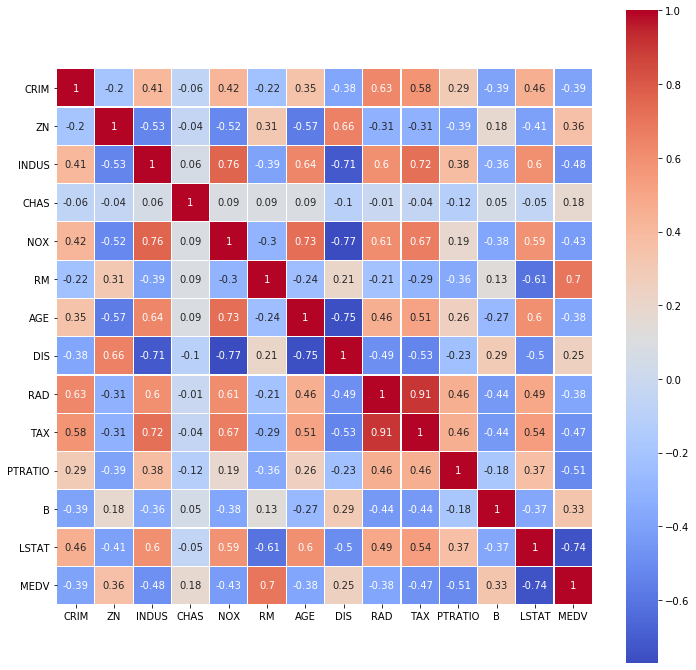

In [58]:
plt.figure(figsize=(12,12))
sns.heatmap(data=df.corr().round(2),annot=True,cmap='coolwarm',linewidths=0.2,square=True)

Text(0.5, 1, 'Correlation between features')

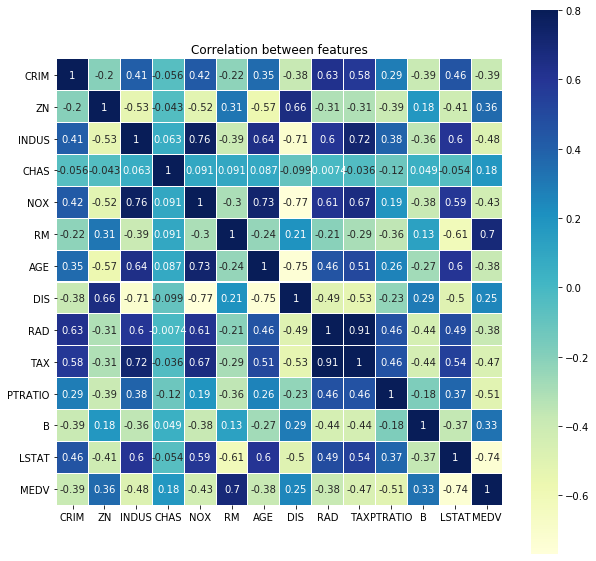

In [77]:
corr=df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features')

In [61]:
from pandas import set_option
set_option('precision', 1)
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.1e+02,506.0,506.0,5.1e+02,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,3.6e+00,11.4,11.1,6.9e-02,0.6,6.3,68.6,3.8,9.5,408.2,18.5,356.7,12.7,22.5
std,8.6e+00,23.3,6.9,2.5e-01,0.1,0.7,28.1,2.1,8.7,168.5,2.2,91.3,7.1,9.2
min,6.3e-03,0.0,0.5,0.0e+00,0.4,3.6,2.9,1.1,1.0,187.0,12.6,0.3,1.7,5.0
25%,8.2e-02,0.0,5.2,0.0e+00,0.4,5.9,45.0,2.1,4.0,279.0,17.4,375.4,6.9,17.0
50%,2.6e-01,0.0,9.7,0.0e+00,0.5,6.2,77.5,3.2,5.0,330.0,19.1,391.4,11.4,21.2
75%,3.7e+00,12.5,18.1,0.0e+00,0.6,6.6,94.1,5.2,24.0,666.0,20.2,396.2,17.0,25.0
max,8.9e+01,100.0,27.7,1.0e+00,0.9,8.8,100.0,12.1,24.0,711.0,22.0,396.9,38.0,50.0


#### Observations

- Postive sign implies postive correlation between two features whereas Negative sign implies negative correlation between two features.
- The features INDUS, RM, TAX, PTRATIO and LSTAT shows some good correaltion with MEDV

In [62]:
df1 = df[['CHAS', 'RM','TAX','PTRATIO','LSTAT', 'B','MEDV']]
df1.head()

,CHAS,RM,TAX,PTRATIO,LSTAT,B,MEDV
0,0,6.6,296.0,15.3,5.0,396.9,24.0
1,0,6.4,242.0,17.8,9.1,396.9,21.6
2,0,7.2,242.0,17.8,4.0,392.8,34.7
3,0,7.0,222.0,18.7,2.9,394.6,33.4
4,0,7.1,222.0,18.7,5.3,396.9,36.2


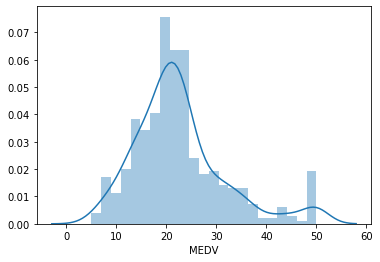

In [63]:
import seaborn as sns
sns.distplot(df1['MEDV']);

MEDV is Deviated from the normal distribution, have appreciable positive skewness and showed peakedness.

#### Multivariate Visualization

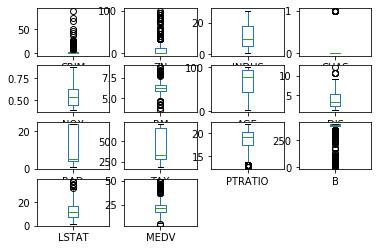

In [76]:
# box and whisker plots
df.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False)
pyplot.show()

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

#### Predictive analytics

In [81]:
# Split-out validation dataset
array = df.values
X = array[:,0:6]
Y = array[:,6]
validation_size = 0.20
seed = 2020
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [82]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 6)
(102, 6)
(404,)
(102,)


In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [84]:
y_pred = lin_model.predict(X_test)
y_pred.astype('float64')

array([ 83.33075213,  47.22551725,  92.50946727,  27.15849168,
        62.66781254,  68.11575743,  63.09489088,  93.60301233,
        91.70637767,  34.12515087,  63.68231079,  84.48948273,
        66.40109403,  87.51752075,  90.95578977,  66.17956832,
        91.54473509,  70.29176494,  43.14590808,  72.17317173,
        85.47727082,  28.80473099,  69.31195806,  33.96627079,
        96.39567581,  92.58862017,  58.59602588,  96.03965441,
        65.24842507, 104.01842375,  70.88055253,  42.47226775,
        96.17069089,  63.73808242,  73.8800181 , 114.78422387,
        82.09019302,  39.22945102, 101.6023864 ,  68.19213763,
        75.04512311,  61.85682401,  67.93944094,  27.00880961,
       113.9928432 ,  85.58352939,  20.95023621,  99.43287064,
        54.42973058,  40.35177592,  39.76947565,  34.49673474,
        66.51112338,  85.26042506,  67.11206778, 112.35814731,
        44.36700755,  92.37857135,  91.85190763,  44.05554694,
        47.54377211,  73.89835558,  59.24256319,  76.27

In [85]:
y_pred.reshape(102)

array([ 83.33075213,  47.22551725,  92.50946727,  27.15849168,
        62.66781254,  68.11575743,  63.09489088,  93.60301233,
        91.70637767,  34.12515087,  63.68231079,  84.48948273,
        66.40109403,  87.51752075,  90.95578977,  66.17956832,
        91.54473509,  70.29176494,  43.14590808,  72.17317173,
        85.47727082,  28.80473099,  69.31195806,  33.96627079,
        96.39567581,  92.58862017,  58.59602588,  96.03965441,
        65.24842507, 104.01842375,  70.88055253,  42.47226775,
        96.17069089,  63.73808242,  73.8800181 , 114.78422387,
        82.09019302,  39.22945102, 101.6023864 ,  68.19213763,
        75.04512311,  61.85682401,  67.93944094,  27.00880961,
       113.9928432 ,  85.58352939,  20.95023621,  99.43287064,
        54.42973058,  40.35177592,  39.76947565,  34.49673474,
        66.51112338,  85.26042506,  67.11206778, 112.35814731,
        44.36700755,  92.37857135,  91.85190763,  44.05554694,
        47.54377211,  73.89835558,  59.24256319,  76.27

FROM ABOVE RESULT OF Y-test and Y-pred WE CAN SAY THAT OUR MODEL IS PREDICTING GOOD NOW WE CAN USE RMSE (The root-mean-square deviation (RMSD) or root-mean-square error (RMSE) (or sometimes root-mean-squared error) is a frequently used measure of the differences between values (sample or population values) predicted by a model or an estimator and the values observed.) AND R2 ( R-squared is a statistical measure that’s used to assess the goodness of fit of our regression model ).

In [ ]:
# model evaluation for training set
from sklearn.metrics import r2_score
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

### Reference

https://www.kaggle.com/alexisbcook/introduction